In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('fivethirtyeight')
import numpy as np 

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(data=boston.data,columns=boston.feature_names)
data['Medv'] = boston.target

In [ ]:
data.info()

In [ ]:
data.describe()

In [181]:
from sklearn.preprocessing import StandardScaler as SS
scale = SS()
# '''scale.fit(data)
# scaled=scale.fit_transform(data)
# df = pd.DataFrame(data=scaled,columns=data.columns.to_list())
# df.head()'''
df = data.copy()

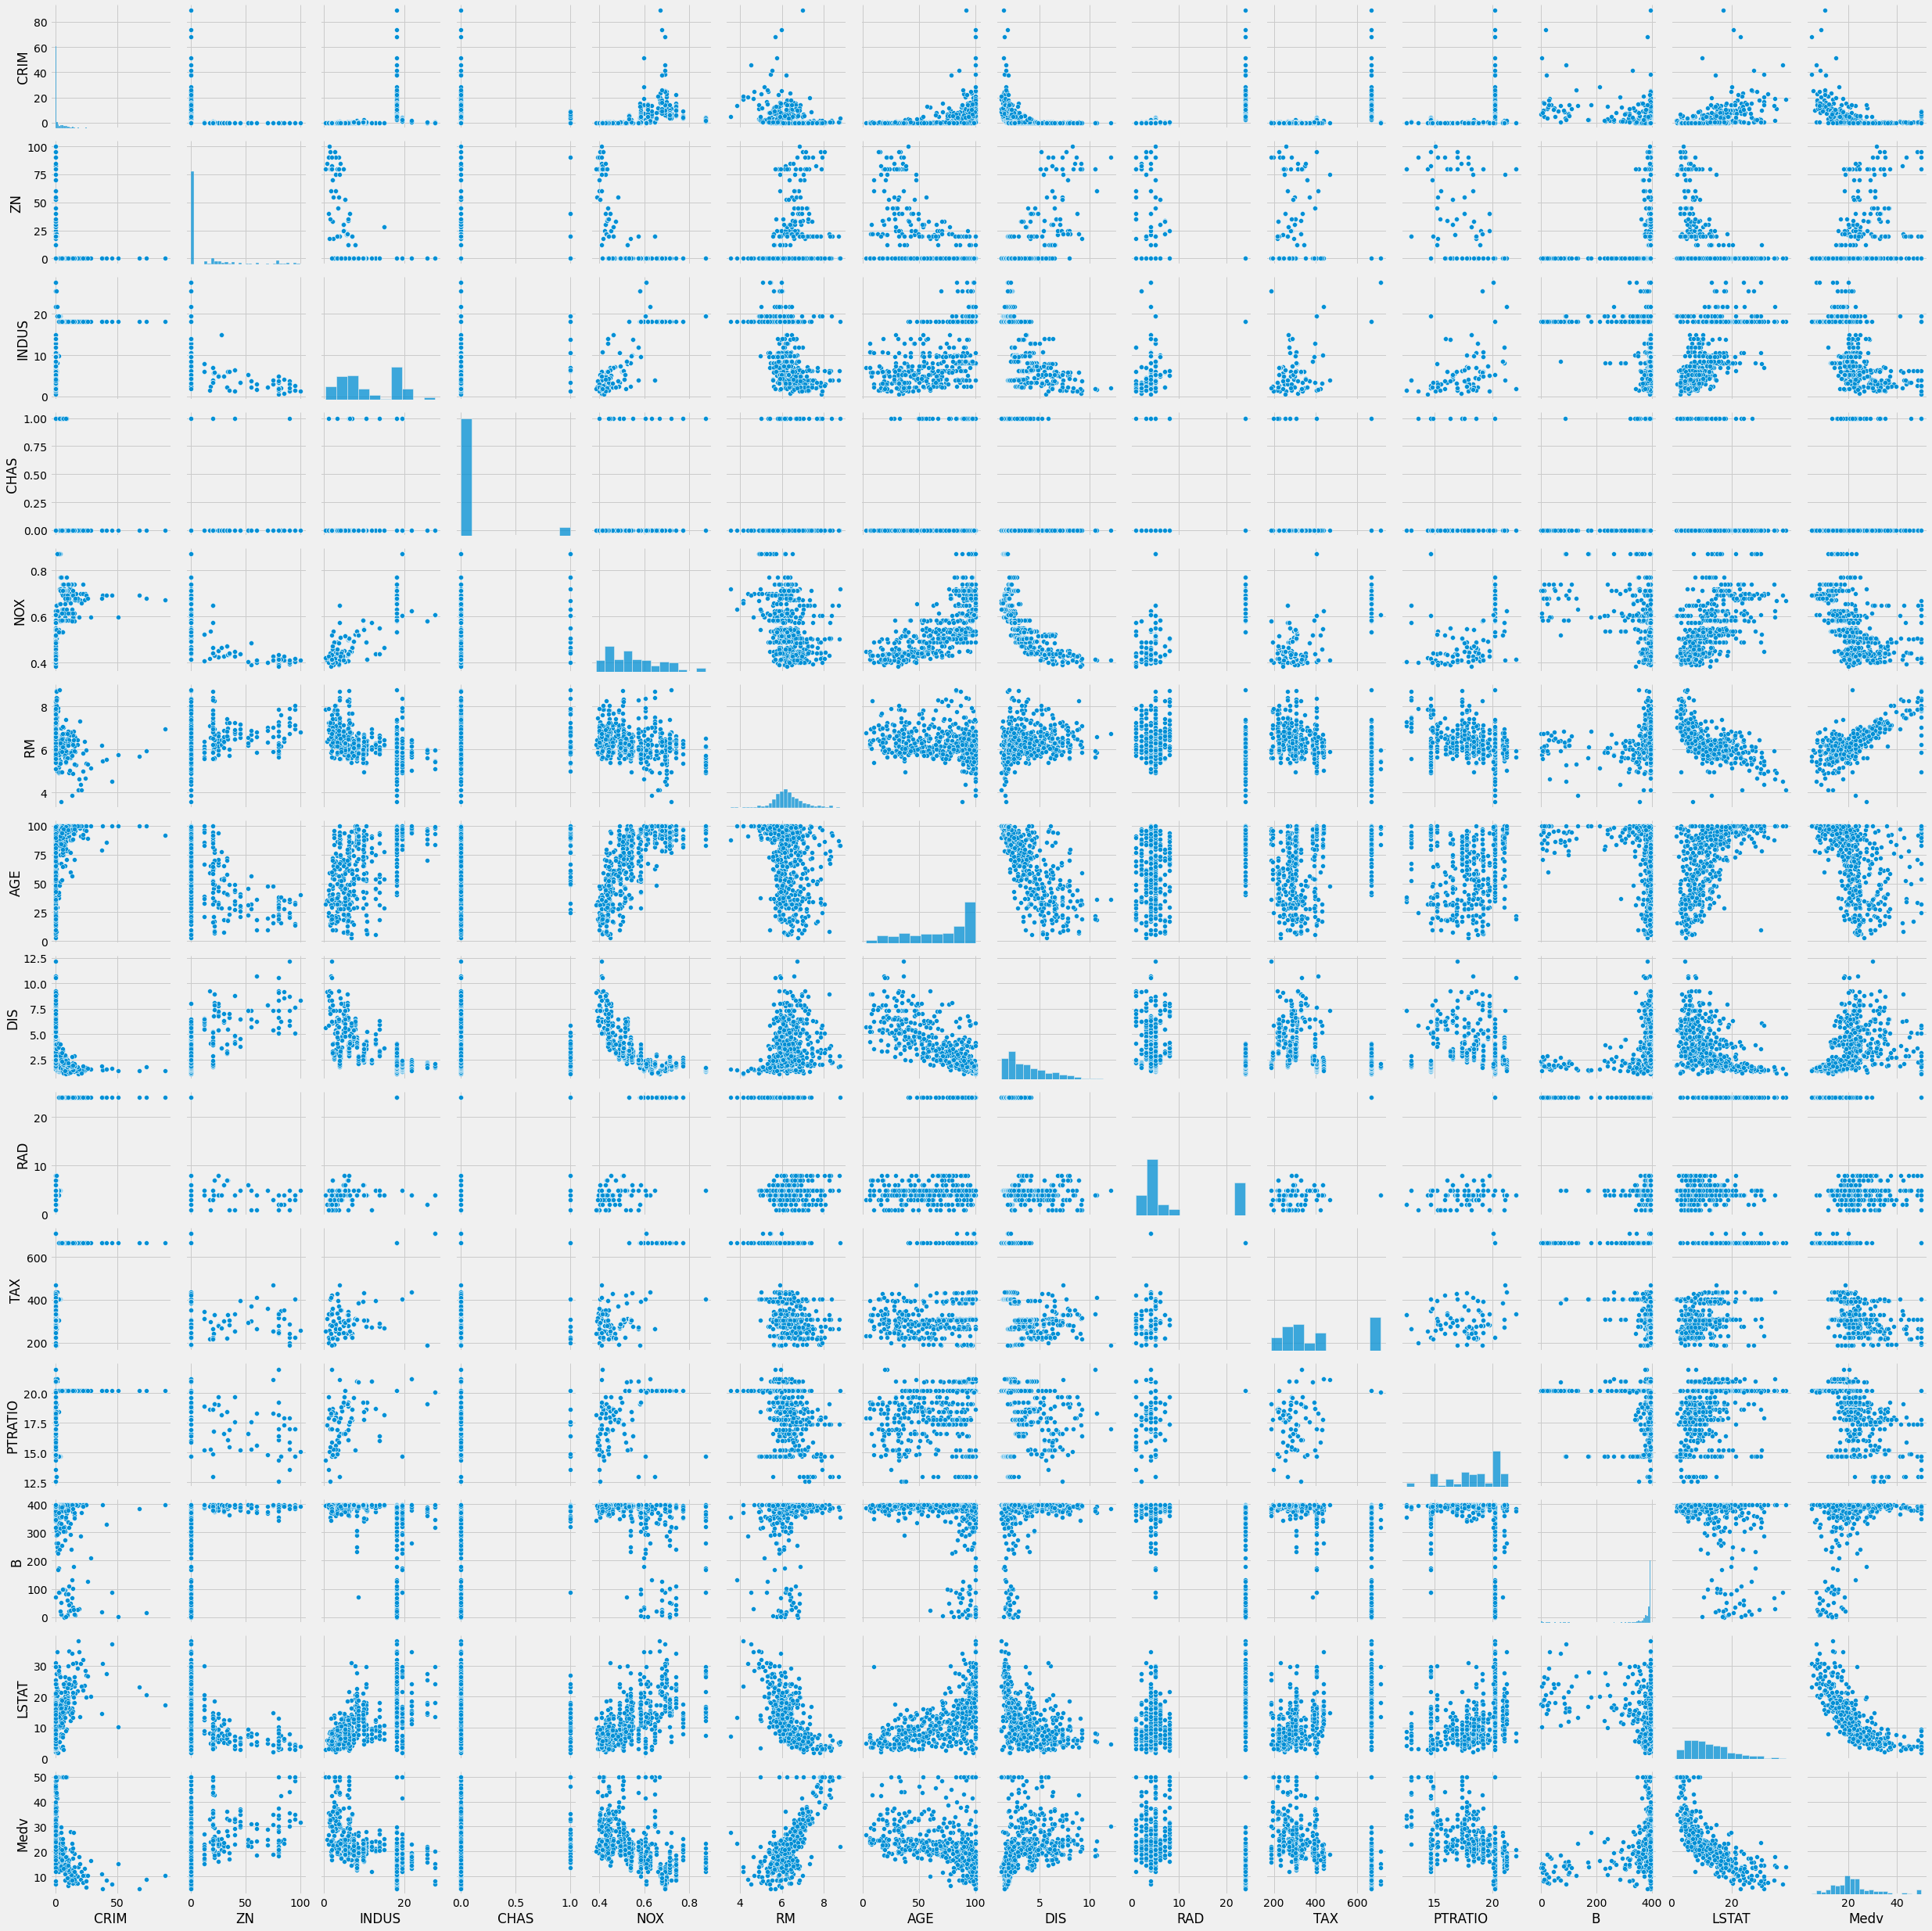

In [29]:
sns.pairplot(data)
plt.show()

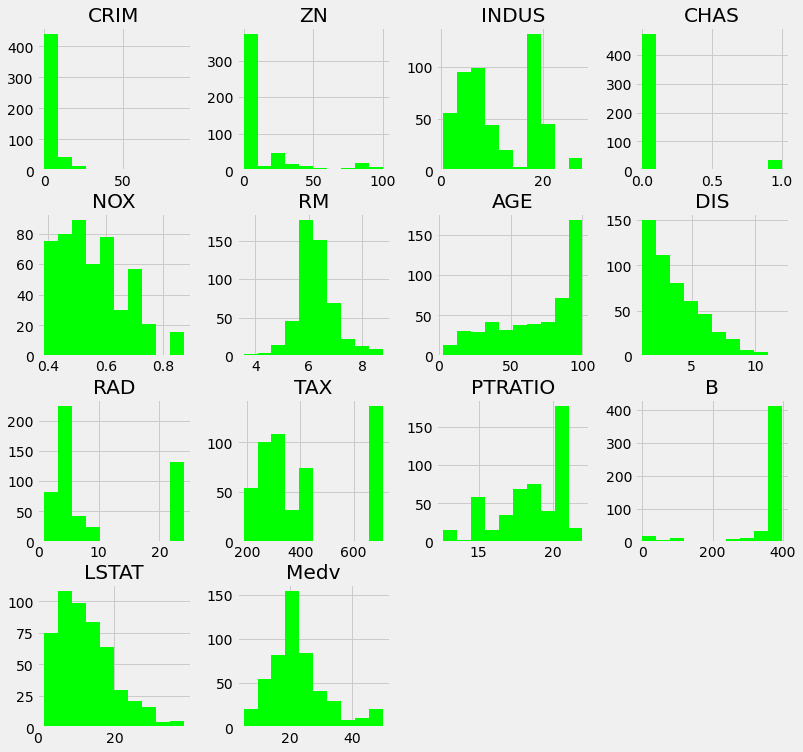

In [144]:
df.hist(figsize=(12,12),color='lime')
plt.show()

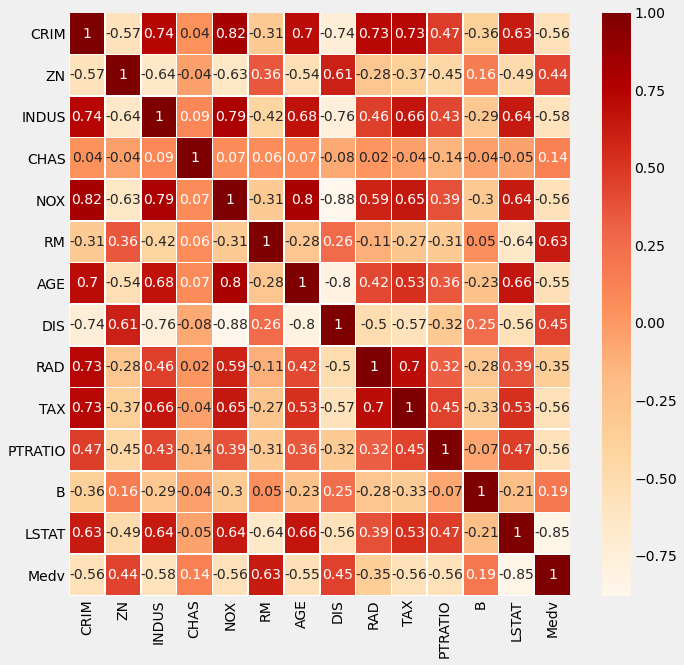

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='spearman').round(2),cmap='OrRd',annot=True,linewidths=0.5)
plt.show()

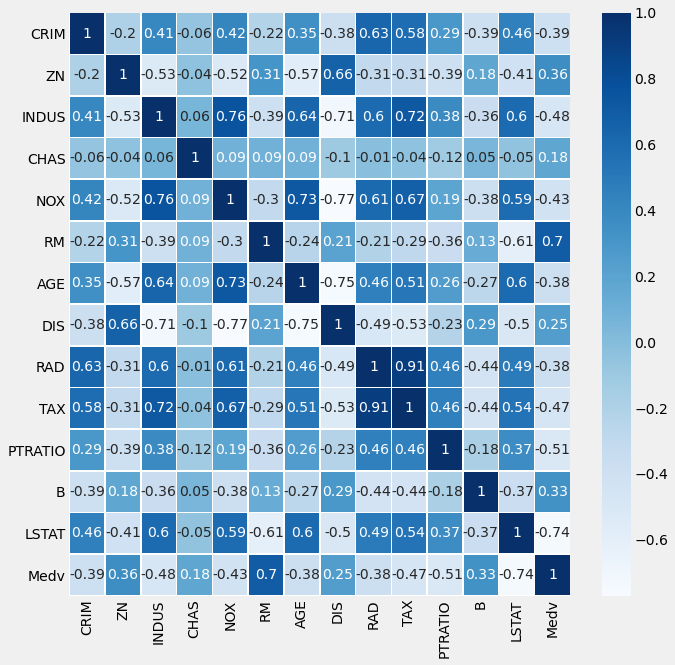

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson').round(2),cmap='Blues',annot=True,linewidths=0.5)
plt.show()

In [209]:
x = df[boston.feature_names].copy()
y = df['Medv']

In [219]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)
scaled = scale.fit_transform(xtrain)
xtrain = pd.DataFrame(scaled,columns=xtrain.columns.to_list())

In [220]:
scaled = scale.transform(xtest)
xtest = pd.DataFrame(scaled,columns=xtrain.columns.to_list())

In [221]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=8)
mse = cross_validate(lr,x,y,scoring='neg_mean_squared_error',cv=kf)
#print(mse['test_score'],'\nMean Mse=',np.mean(mse['test_score']))

In [222]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model = GridSearchCV(lr,parameters ,scoring='neg_mean_squared_error',cv=kf)
model.fit(x,y)
gmse=model.best_score_

In [223]:
lnr =LinearRegression()
lnr.fit(xtrain,ytrain)
ypred = lnr.predict(xtest)

In [224]:
model.fit(xtrain,ytrain)
predicted=model.predict(xtest)

In [225]:
from sklearn.metrics import mean_squared_error,r2_score 
mse_tt=mean_squared_error(ytest,ypred)
rmse_tt=np.sqrt(mse_tt)

In [226]:
mse_cv=mean_squared_error(ytest,predicted)
rmse_cv=np.sqrt(mse_cv)
r2_cv = r2_score(ytest,predicted)

In [227]:
metrics = pd.DataFrame(data=[['Train Test Split & Model',mse_tt,rmse_tt,r2_tt],['Train Test SPlit & CV Model',mse_cv,rmse_cv,r2_cv]],columns=['Way Trained','MSE','RMSE','R**2'])
metrics

,Way Trained,MSE,RMSE,R**2
0,Train Test Split & Model,24.291119,4.928602,0.668759
1,Train Test SPlit & CV Model,24.291119,4.928602,0.668759
